<a href="https://colab.research.google.com/github/Eswa2020/Data-analysis-and-wrangling-various-projects/blob/master/geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.4MB/s 
     |████████████████████████████████| 6.5MB 14.6MB/s 
     |████████████████████████████████| 15.3MB 265kB/s 


In [4]:
import geopandas as gpd

In [25]:
#reading the world shapefile
world_data=gpd.read_file('/content/world.shp')
world_data.head(15)

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
5,AO,AO,AGO,24,Angola,124670,16095214,2,17,17.544,-12.296,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
6,AQ,AS,ASM,16,American Samoa,20,64051,9,61,-170.730,-14.318,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
7,AR,AR,ARG,32,Argentina,273669,38747148,19,5,-65.167,-35.377,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056..."
8,AS,AU,AUS,36,Australia,768230,20310208,9,53,136.189,-24.973,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967..."
9,BA,BH,BHR,48,Bahrain,71,724788,142,145,50.562,26.019,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25..."


In [14]:
type(world_data)

geopandas.geodataframe.GeoDataFrame

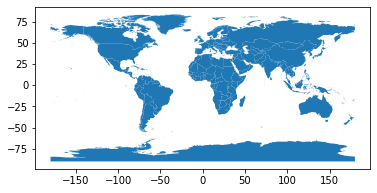

In [15]:
#visualing the data
world_data.plot()

In [17]:
#we choose two columns instead of all
world_data2=world_data[['NAME','geometry']]
world_data2

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
241,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
242,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
243,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
244,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


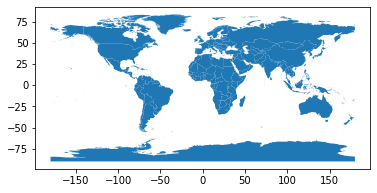

In [18]:
world_data2.plot()

In [21]:
#calculating the area of each country
world_data['AREA']=world_data2.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [22]:
world_data2.head()

,NAME,geometry,area
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093


In [37]:
#removing antartica from  the world geoframe using geopandas
world_data3=world_data2[world_data2['NAME']!='Antarctica']
world_data3

,NAME,geometry,area
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093
...,...,...,...
241,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015...",0.004696
242,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249...",0.009359
243,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722...",0.015408
244,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",0.542074


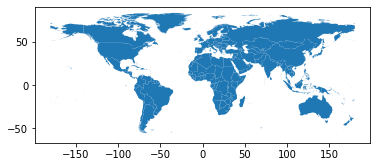

In [38]:
world_data3.plot()

In [40]:
#changing the projections
#checking the co-ordinates
current_crs=world_data3.crs
current_crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
#to change the  above crs projection 
#espg code 3857 is google maps and is in metres
world_data3.to_crs(epsg=3857,inplace=True)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


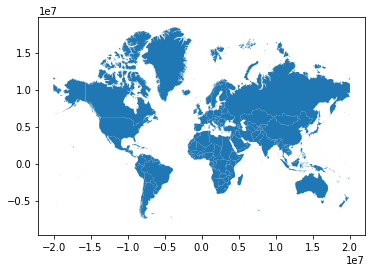

In [43]:
#we can observation that even the projection and how it looks changes
#its a more familiar  format used by even google maps
#this is a projected co-ordinate system
world_data3.plot()


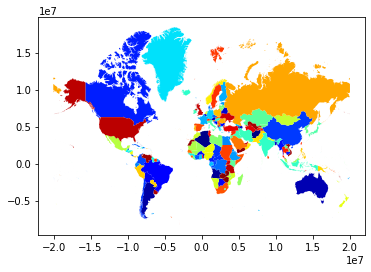

In [44]:
#we can now colour the map by passing arguments in the plot function
#we want to colour depending on the names of each country
#you can use different color maps theurl below can help
#https://matplotlib.org/2.0.2/users/colormaps.html
world_data3.plot(column='NAME',cmap='jet')

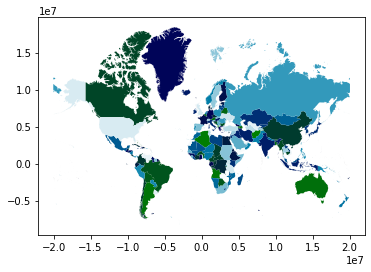

In [54]:
world_data3.plot(column='NAME',cmap='ocean')

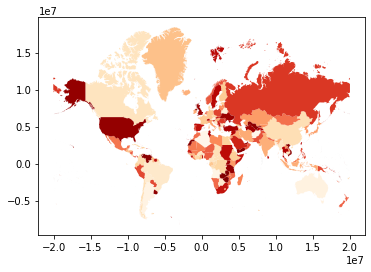

In [45]:
world_data3.plot(column='NAME',cmap='OrRd')

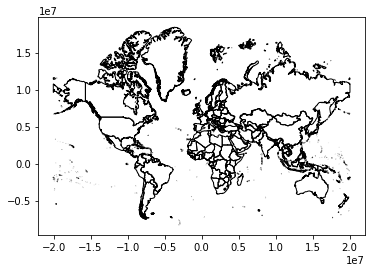

In [52]:
#when you want to make the color transparent for when you just want to show the boundary,
world_data3.plot(facecolor="none", edgecolor="black")

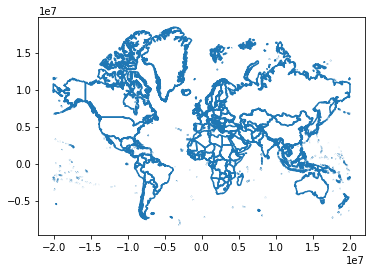

In [53]:
#we can also use
world_data3.boundary.plot()

In [48]:
!pip install mapclassify

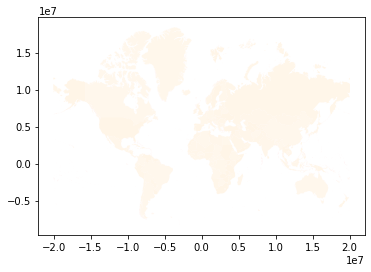

In [49]:
import mapclassify.classifiers as classifiers
world_data3.plot(column='NAME',cmap='OrRd',scheme='quantiles')

In [55]:
#Re-calculate the areas to square kilometres instead of the decimal just we changed the co-ordinate projections
world_data3['area']=world_data3.area/1000000

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [56]:
world_data3.head()

,NAME,geometry,area
0,Antigua and Barbuda,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",5.993606e+02
1,Algeria,"POLYGON ((329907.556 4411573.988, 331886.705 4...",3.014479e+06
2,Azerbaijan,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",1.478874e+05
3,Albania,"POLYGON ((2163629.445 5015449.243, 2165225.767...",5.062603e+04
4,Armenia,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",5.104906e+04


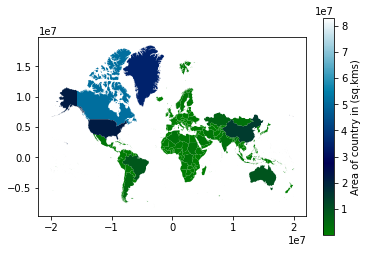

In [58]:
#adding a legend
#usually used with populations or gdp but since we dont have that we willuse the area
world_data3.plot(column='area',cmap='ocean',legend=True,legend_kwds={'label':'Area of country in (sq.kms)'})

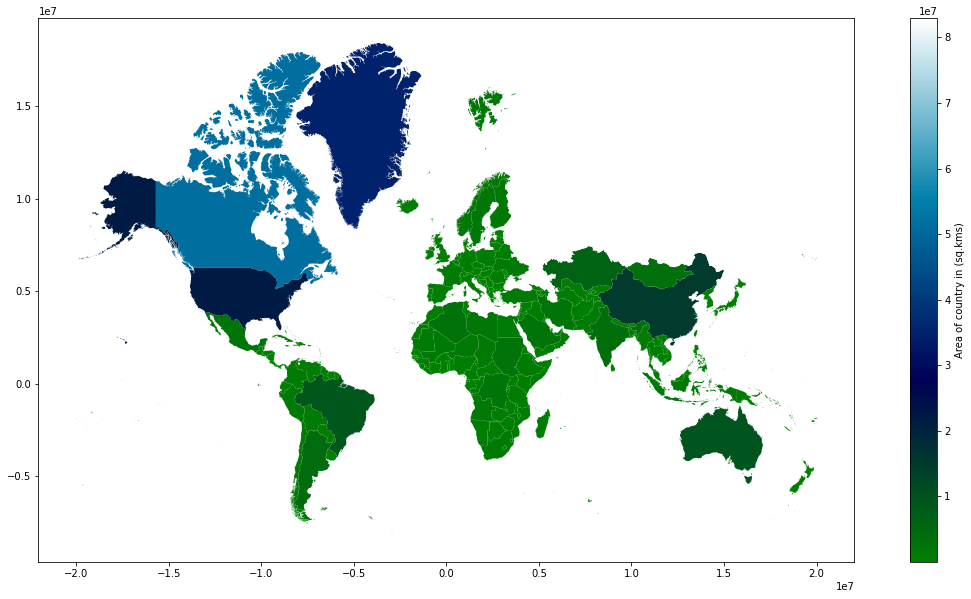

In [61]:
#increasing size of figure/map

world_data3.plot(column='area',cmap='ocean',legend=True,legend_kwds={'label':'Area of country in (sq.kms)'},figsize=(20,10))

In [63]:
#if you want to know how to resize automatically we have to import some libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

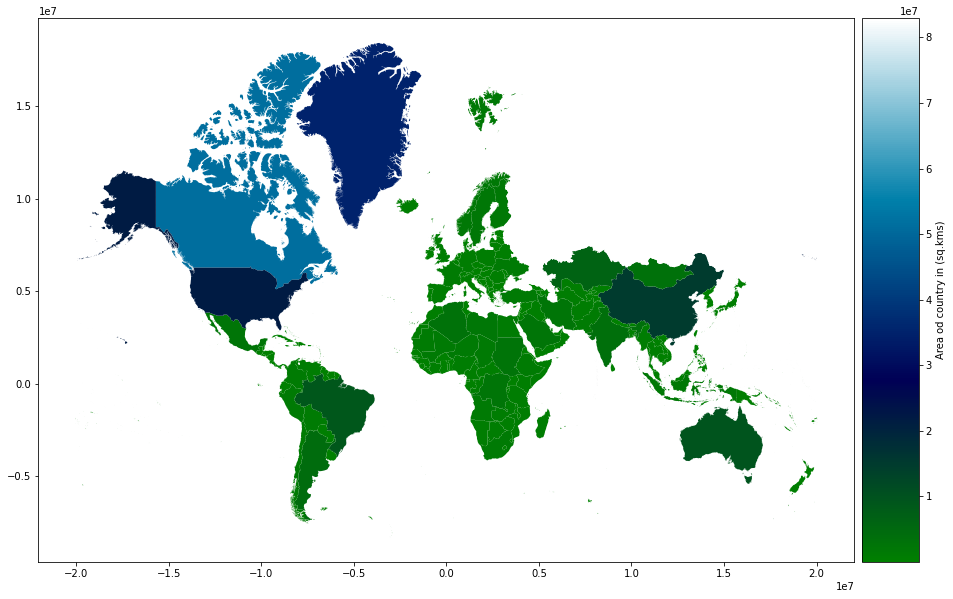

In [67]:
fig,ax=plt.subplots(figsize=(20,10))
divider=make_axes_locatable(ax)
cax=divider.append_axes("right",size="7%",pad=0.1)
world_data3.plot(column='area',cmap='ocean',legend=True,legend_kwds={'label':'Area od country in (sq.kms)'},ax=ax,cax=cax)